Lucas van Wijk: 1719949

https://github.com/LucasVanWijk/HPP_Herkansing


# Beschrijving Merge sort

In een single-thread merge sort wordt de gehele array eerst opgedeeld in kleinere subarrays. Stel dat we de volgende array hebben: [12, 7, 9, 3, 14, 8, 1, 10]. Dan is de werking van merge sort als volgd:

Deze array wordt vervolgens verdeeld in twee subarrays: [12, 7, 9, 3](noemen we A) en [14, 8, 1, 10](noemen we B).

A1: De eerste subarray wordt verder opgedeeld in: [12, 7].\
B1: De tweede subarray word opgedeeld in [9, 3].

A2: De eerste subarray wordt verder opgedeeld in: [12] en [7].\
B2: De tweede usbarray word opgedeeld in [9] en [3].

Nu begint het merge-gedeelte van het algoritme. \
A1: 12 en 7 worden samengevoegd tot [7, 12].\
A2: 9 en 3 worden samengevoegd tot [3, 9].\
Deze twee arrays worden vervolgens gecombineerd tot de gesorteerde array: [3, 7, 9, 12].\

B1: 14 en 8 worden gecombineerd tot [8, 14].\
B2: 1 en 10 worden gecombineerd tot [1, 10].

Vervolgens worden deze arrays gecombineerd en gesorteerd tot: [1, 8, 10, 14]. \
Nu hebben we twee gesorteerde arrays: [3, 7, 9, 12] en [1, 8, 10, 14]. In de laatste stap worden deze samengevoegd en gesorteerd tot: [1, 3, 7, 8, 9, 10, 12, 14]. Onze array is nu volledig gesorteerd.

# Multithreaded

## Ontwerp

In mijn ervaring is de makkelijkste manier om te bekijken hoe een programma geparelasieerd kan worden om te kijken naar welke proccesdelen/functies kunnen functioneren zonder informatie te hebben over de rest van het procces. In andere woorden welk procces deel geef je een enkele input en kan daar mee aan de slag. In merge sort is dat relatief eenvoudig. Na voor de eerste keer splitsen van de array heb je geen informatie nodig over de andere arrays totdat "jouw" array volledig is gesorteerd en weer moet worden samengevoegd met de andere. In plaats van de array in 2 splisten splisten we het op basis van hoeveel threats er beschikbaar zijn. Als er 4 threads beschikbaar zijn wordt de array in de eerste stap in 4 gedeeld. Als de subarrays zijn gesorteerd worden ze vervolgens door de main thread weer samengevoegd.



## Resultaten

Text(0, 0.5, 'CPU time (s)')

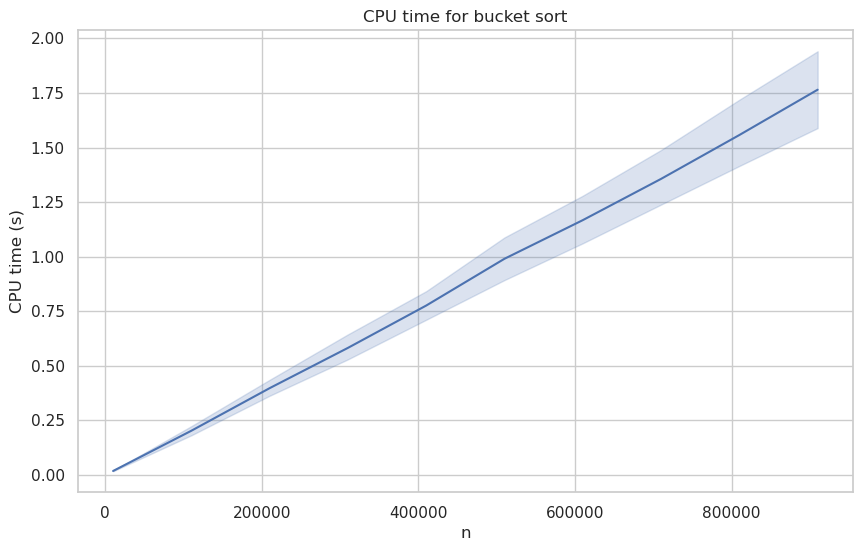

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

merge_sort_time = pd.read_csv('results/time_merge_thread.csv', names=['cores', 'n', 'cpu_time', 'cpu_ticks'])
# plot cpu time
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.title('CPU time for bucket sort')
sns.lineplot(x='n', y='cpu_time', data=merge_sort_time)
plt.xlabel('n')
plt.ylabel('CPU time (s)')


Hier is de complexiteit ook O(n). Dit lijkt mischien apart maar is eigelijk erg logisch. De parrelisatie heeft namelijk geen effect op het algoritme zelf. De hoeveelheid computaties die nodig zijn om een lijst van 100 getallen te sorteren is het zelfde ongeacht of je het met 1 of meer cores/threads doet. Hoe snel die computaties worden uitgevoerd veranderd wel. 

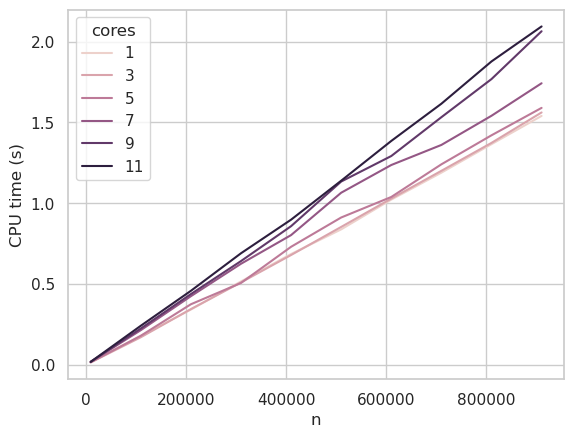

In [ ]:
sns.lineplot(x='n', y='cpu_time', hue='cores', data=merge_sort_time)
plt.xlabel('n')
plt.ylabel('CPU time (s)')

plt.show()

Na wat onderzoek kwam ik er achter dat mijn laptop erg bottlenecked. Bij het gebruik van een core gebruikt die 100% maar omdat de andere cores geen berekeningen maken blijft de temperatuur laag. Als ik het process meer threads geef stijgt de temperatuur naar 94C en neemt de prestatie af. Dit is mogelijk ook waarom de duur begint te varriere na n = 2e6. Ook heeft mijn laptop beschiking tot Intel Turbo Boost en SpeedStep. Het kan dus dat de cpu op een core erg actief bezig is en dus gaat boesten. Als er gebruik wordt gemaakt van meer cores is de "stress" dusdanig laag dat het geen gebruik maakt van de boost. De klockfreqentie is dan dus lager en een thread doet er and langer over om klaar te zijn. 

Het kan uiteraard ook dat er een fout in de implementatie zit. Dit kan zijn dat het programma na het aanmaken van de threads moet wachten tot een thread klaar is voordat hij de volgende aanmaakt. Echter lijkt na inspectie met de debugger dit niet het geval. Verder zie ik niet waar het anders fout gaat. Het kan dat het spawnen van de threads erg tijds intensief is en meer tijd kost dan het oplevert. Het kan dat mijn cpu al optimalisaties uit voert als het op een core werkt en dat "under the hood" eigelijk al parrelelisatie plaats vind. Het kan ook dat het samenvoegen van de verschillende threads/arrays een dusdanige bottleneck vormt dat er geen prestatie winst is. Of dat alles moet wachten op de laatste thread die is aangemaakt voordat het de lijsten gaat samenvoegen. 